<a href="https://colab.research.google.com/github/ElielLucas/Digital-Image-Processing/blob/main/AED2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageFilter
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimage
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os
from natsort import natsorted
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Viewer requires Qt
  


In [ ]:
def extrair_frames(dir):
  vidcap = cv2.VideoCapture(dir)
  count = 0

  success,image = vidcap.read()
  while vidcap.isOpened() and success:
    cv2.imwrite("frames/frame%d.jpg" % count, image)
    count += 1
    success,image = vidcap.read()

  vidcap.release()
  cv2.destroyAllWindows()

In [ ]:
def convert_frames_to_video():
  pasta = os.listdir('/content/mascara')
  pasta = natsorted(pasta)

  list_frames = []
  for frame in pasta:
      img = cv2.imread('/content/mascara/'+ frame)
      height, width, layers = img.shape
      size = (width,height)
      list_frames.append(img)

  out = cv2.VideoWriter('video_adubo_alterado.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

  for i in range(len(list_frames)):
    out.write(list_frames[i])
  out.release()

In [ ]:
def list_frames():
  pasta = os.listdir('/content/frames')
  pasta = natsorted(pasta)

  list_frames = []
  for frame in pasta:
    list_frames.append(cv2.imread('/content/frames/' + frame))
  return list_frames

In [ ]:
def list_col(image, col, N):
  output = []
  for i in range(0, N):
      output.append(image[i][col])

  return output

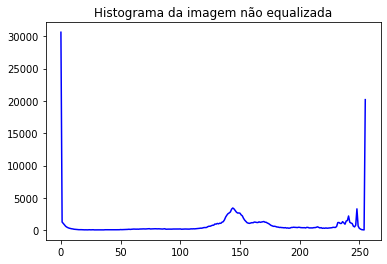

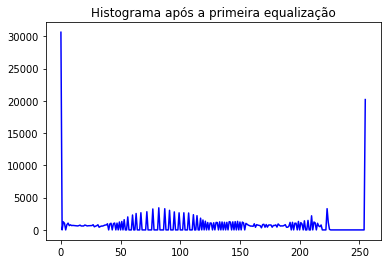

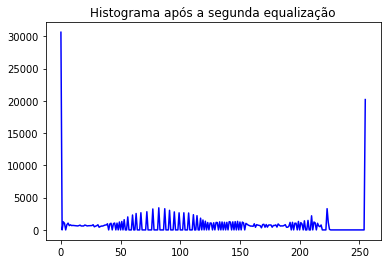

In [ ]:
# extrair_frames('video_adubo.mp4')
list_frm = []
qnt_frames = len(list_frm)
count = 0

list_frm.append(cv2.imread('ruidosalpimenta.png'))
for frame in range(0, 1):
    im1 = list_frm[frame]
    N, M, _ = im1.shape

    # Converte a imagem para a escala de cinza
    R, G, B = im1[:,:,0], im1[:,:,1], im1[:,:,2]
    im1_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B

    # Calcula e plota o histograma da imagem original
    x = cv2.calcHist([im1], [0], None, [256], [0, 256])
    plt.plot(x, color='b')
    plt.title('Histograma da imagem não equalizada')
    plt.show()

    # Equaliza o histograma da imagem original
    img_yuv1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YUV)
    img_yuv1[:,:,0] = cv2.equalizeHist(img_yuv1[:,:,0])
    hist_equalization = cv2.cvtColor(img_yuv1, cv2.COLOR_YUV2BGR)

    # Calcula e plota o histograma da imagem equalizada pela primeira vez
    x = cv2.calcHist([hist_equalization], [0], None, [256], [0, 256])
    plt.plot(x, color='b')
    plt.title('Histograma após a primeira equalização')
    plt.show()

    # Equaliza o histograma pela segunda vez, sobre a imagem que
    # já recebeu a equalização
    img_yuv1 = cv2.cvtColor(hist_equalization, cv2.COLOR_BGR2YUV)
    img_yuv1[:,:,0] = cv2.equalizeHist(img_yuv1[:,:,0])
    hist_equalization = cv2.cvtColor(img_yuv1, cv2.COLOR_YUV2BGR)

    # Calcula e plota o histograma da imagem equalizada pela segunda vez
    x = cv2.calcHist([hist_equalization], [0], None, [256], [0, 256])
    plt.plot(x, color='b')
    plt.title('Histograma após a segunda equalização')
    plt.show()


    img_yuv2 = cv2.cvtColor(im2, cv2.COLOR_BGR2YUV)
    img_yuv2[:,:,0] = cv2.equalizeHist(img_yuv2[:,:,0])

    R, G, B = img_yuv1[:,:,0], img_yuv1[:,:,1], img_yuv1[:,:,2]
    im1_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    R, G, B = img_yuv2[:,:,0], img_yuv2[:,:,1], img_yuv2[:,:,2]
    im2_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B

    aux = 1/9 * np.ones((3, 3))
    mascara = np.zeros((N, M), dtype='uint8')
    for i in range(1, N - 1):
        for j in range(1, M - 1):
          temp = [im1_gray[i-1][j-1:j+2], im1_gray[i][j-1:j+2], im1_gray[i+1][j-1:j+2]]*aux
          media = sum(temp.reshape(9,1)) - 0.4
          if (im1_gray[i][j] < media):
              mascara[i][j] = 1

    mascara2 = np.zeros((N, M), dtype='uint8')
    for j in range(M):
        val_rows = list_col(mascara, j, N)
        median = np.median(val_rows)
        if median:
          for i in range(N):
            mascara2[i][j] = median

    mascara3 = im1.copy()
    for i in range(N):
      for j in range(M):
        mascara3[i][j] = hist_equalization[i][j]*mascara[i][j]

    cv2.imwrite('mascara/frame%d.jpg' %count, mascara3)
    count += 1

convert_frames_to_video()

In [ ]:
convert_frames_to_video()